In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

global_power_path = "Resources/global_power_plant_database.csv"
global_gni_path = "Resources/Global_gni.csv"
global_population_path = "Resources/global_population_dataset.csv"

global_powerdf = pd.read_csv(global_power_path)
global_gnidf = pd.read_csv(global_gni_path)
global_population = pd.read_csv(global_population_path)

global_gnidf.head()


C:\Users\NMcmahon\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,22450.000000,23520.000000,24510.000000,25350.000000,26560.000000,26840.000000,27120.000000,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1563.676371,1669.134226,1697.844163,1677.094818,1579.434512,1475.405527,1441.531746,1494.710171,1535.776856,1406.289007
2,Afghanistan,AFG,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,530.000000,630.000000,650.000000,630.000000,590.000000,550.000000,530.000000,510.000000,520.000000,500.000000
3,Africa Western and Central,AFW,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,NaN,NaN,113.682775,122.151563,128.210427,133.154859,...,1605.673050,1774.034998,1931.807956,2061.522937,2005.476912,1782.153990,1611.489483,1611.865620,1669.153323,1654.425660
4,Angola,AGO,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3410.000000,4170.000000,4780.000000,5010.000000,4520.000000,3770.000000,3450.000000,3210.000000,2970.000000,2140.000000


In [2]:
global_powerdf.head()


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [3]:
global_population.head

global_population_cleandf = global_population[['Country Name', 'Country Code', '2020']]

global_population_cleandf.head()


,Country Name,Country Code,2020
0,Aruba,ABW,106766.0
1,Africa Eastern and Southern,AFE,677243299.0
2,Afghanistan,AFG,38928341.0
3,Africa Western and Central,AFW,458803476.0
4,Angola,AGO,32866268.0


In [4]:
global_power_cleandf = global_powerdf[['country', 'country_long', 'name', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel' ]]


global_power_cleandf.rename(columns={'country_long': 'Country Name',  'country': 'Country Code'}, inplace=True)

global_power_cleandf.head()

C:\Users\NMcmahon\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Country Code,Country Name,name,capacity_mw,latitude,longitude,primary_fuel
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.322,65.1190,Hydro
1,AFG,Afghanistan,Kandahar DOG,10.0,31.670,65.7950,Solar
2,AFG,Afghanistan,Kandahar JOL,10.0,31.623,65.7920,Solar
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,34.556,69.4787,Hydro
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,34.641,69.7170,Hydro


In [5]:
global_gni_cleandf = global_gnidf[['Country Name', 'Country Code', '2020']]
global_gni_cleandf = global_gni_cleandf.dropna()
global_gni_cleandf.head()

,Country Name,Country Code,2020
1,Africa Eastern and Southern,AFE,1406.289007
2,Afghanistan,AFG,500.000000
3,Africa Western and Central,AFW,1654.425660
4,Angola,AGO,2140.000000
5,Albania,ALB,5210.000000


In [6]:
merged_power_plantdf = pd.merge(global_power_cleandf, global_gni_cleandf, how="left", on=["Country Code", "Country Code"])
merged_power_plantdf.head(50)

merged_power_plantdf =  merged_power_plantdf[['Country Code', 'Country Name_x', 'name', 'capacity_mw', 'latitude',
       'longitude', 'primary_fuel', '2020']]

merged_power_plantdf.head()

,Country Code,Country Name_x,name,capacity_mw,latitude,longitude,primary_fuel,2020
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.322,65.1190,Hydro,500.0
1,AFG,Afghanistan,Kandahar DOG,10.0,31.670,65.7950,Solar,500.0
2,AFG,Afghanistan,Kandahar JOL,10.0,31.623,65.7920,Solar,500.0
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,34.556,69.4787,Hydro,500.0
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,34.641,69.7170,Hydro,500.0


In [7]:
merged_power_plantdf.rename(columns={'Country Name_x': 'Country Name',  '2020': 'GNI', 'capacity_mw': ' Power Plant Capacity(MWh)', 'latitude': 'Latitude',
'longitude': 'Longitude', 'name': 'Power Plant Name', 'primary_fuel': 'Primary Fuel'}, inplace=True)
merged_power_plantdf.head()

,Country Code,Country Name,Power Plant Name,Power Plant Capacity(MWh),Latitude,Longitude,Primary Fuel,GNI
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.322,65.1190,Hydro,500.0
1,AFG,Afghanistan,Kandahar DOG,10.0,31.670,65.7950,Solar,500.0
2,AFG,Afghanistan,Kandahar JOL,10.0,31.623,65.7920,Solar,500.0
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,34.556,69.4787,Hydro,500.0
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,34.641,69.7170,Hydro,500.0


In [8]:
merged_power_plantdf = pd.merge(merged_power_plantdf, global_population_cleandf, how="left", on=["Country Code", "Country Code"])
merged_power_plantdf.head()



,Country Code,Country Name_x,Power Plant Name,Power Plant Capacity(MWh),Latitude,Longitude,Primary Fuel,GNI,Country Name_y,2020
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.322,65.1190,Hydro,500.0,Afghanistan,38928341.0
1,AFG,Afghanistan,Kandahar DOG,10.0,31.670,65.7950,Solar,500.0,Afghanistan,38928341.0
2,AFG,Afghanistan,Kandahar JOL,10.0,31.623,65.7920,Solar,500.0,Afghanistan,38928341.0
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,34.556,69.4787,Hydro,500.0,Afghanistan,38928341.0
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,34.641,69.7170,Hydro,500.0,Afghanistan,38928341.0


In [9]:
merged_power_plantdf.columns

merged_power_plantdf = merged_power_plantdf[['Country Code', 'Country Name_x', 'Power Plant Name',
       ' Power Plant Capacity(MWh)', 'Latitude', 'Longitude', 'Primary Fuel',
       'GNI', '2020']]

merged_power_plantdf.head()



,Country Code,Country Name_x,Power Plant Name,Power Plant Capacity(MWh),Latitude,Longitude,Primary Fuel,GNI,2020
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.322,65.1190,Hydro,500.0,38928341.0
1,AFG,Afghanistan,Kandahar DOG,10.0,31.670,65.7950,Solar,500.0,38928341.0
2,AFG,Afghanistan,Kandahar JOL,10.0,31.623,65.7920,Solar,500.0,38928341.0
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,34.556,69.4787,Hydro,500.0,38928341.0
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,34.641,69.7170,Hydro,500.0,38928341.0


In [10]:
merged_power_plantdf.rename(columns={'Country Name_x': 'Country Name',  '2020': 'Population'}, inplace=True)

merged_power_plantdf.head(20)

,Country Code,Country Name,Power Plant Name,Power Plant Capacity(MWh),Latitude,Longitude,Primary Fuel,GNI,Population
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.00,32.3220,65.1190,Hydro,500.0,38928341.0
1,AFG,Afghanistan,Kandahar DOG,10.00,31.6700,65.7950,Solar,500.0,38928341.0
2,AFG,Afghanistan,Kandahar JOL,10.00,31.6230,65.7920,Solar,500.0,38928341.0
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.00,34.5560,69.4787,Hydro,500.0,38928341.0
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.00,34.6410,69.7170,Hydro,500.0,38928341.0
5,AFG,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,11.55,34.4847,70.3633,Hydro,500.0,38928341.0
6,AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,42.00,34.5638,69.1134,Gas,500.0,38928341.0
7,AFG,Afghanistan,Pul-e-Khumri Hydroelectric Power Plant Afghani...,6.00,35.9416,68.7100,Hydro,500.0,38928341.0
8,AFG,Afghanistan,Sarobi Dam Hydroelectric Power Plant Afghanistan,22.00,34.5865,69.7757,Hydro,500.0,38928341.0
9,ALB,Albania,Bistrica 1,27.00,39.9116,20.1047,Hydro,5210.0,2837743.0


In [11]:

#> 12615 - developing country

#< 12615 = developed country

merged_power_plantdf['GNI'].max()

bins = [0 , 12614, 83000]
group_Labels = ['Developing', 'Developed']


pd.cut(merged_power_plantdf["GNI"], bins, labels=group_Labels).head()





0    Developing
1    Developing
2    Developing
3    Developing
4    Developing
Name: GNI, dtype: category
Categories (2, object): ['Developing' < 'Developed']

In [12]:
merged_power_plantdf["Country Status"] = pd.cut(merged_power_plantdf["GNI"], bins, labels=group_Labels)
merged_power_plantdf.head(20)




,Country Code,Country Name,Power Plant Name,Power Plant Capacity(MWh),Latitude,Longitude,Primary Fuel,GNI,Population,Country Status
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.00,32.3220,65.1190,Hydro,500.0,38928341.0,Developing
1,AFG,Afghanistan,Kandahar DOG,10.00,31.6700,65.7950,Solar,500.0,38928341.0,Developing
2,AFG,Afghanistan,Kandahar JOL,10.00,31.6230,65.7920,Solar,500.0,38928341.0,Developing
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.00,34.5560,69.4787,Hydro,500.0,38928341.0,Developing
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.00,34.6410,69.7170,Hydro,500.0,38928341.0,Developing
5,AFG,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,11.55,34.4847,70.3633,Hydro,500.0,38928341.0,Developing
6,AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,42.00,34.5638,69.1134,Gas,500.0,38928341.0,Developing
7,AFG,Afghanistan,Pul-e-Khumri Hydroelectric Power Plant Afghani...,6.00,35.9416,68.7100,Hydro,500.0,38928341.0,Developing
8,AFG,Afghanistan,Sarobi Dam Hydroelectric Power Plant Afghanistan,22.00,34.5865,69.7757,Hydro,500.0,38928341.0,Developing
9,ALB,Albania,Bistrica 1,27.00,39.9116,20.1047,Hydro,5210.0,2837743.0,Developing


In [18]:
Developed_power_plant = merged_power_plantdf[merged_power_plantdf["Country Status"] == "Developed"]

Developed_power_plant.head()

,Country Code,Country Name,Power Plant Name,Power Plant Capacity(MWh),Latitude,Longitude,Primary Fuel,GNI,Population,Country Status
336,AUS,Australia,Adelaide Showgrounds,1.0,-34.9453,138.5882,Solar,53690.0,25687041.0,Developed
337,AUS,Australia,Albany Wind Farm,21.6,-35.0641,117.7977,Wind,53690.0,25687041.0,Developed
338,AUS,Australia,Amcor Gawler,4.0,-34.5509,138.7659,Oil,53690.0,25687041.0,Developed
339,AUS,Australia,Angaston,50.0,-34.5034,139.0246,Oil,53690.0,25687041.0,Developed
340,AUS,Australia,Anglesea,165.0,-38.3861,144.1828,Coal,53690.0,25687041.0,Developed


In [14]:
Developing_power_plant = merged_power_plantdf[merged_power_plantdf["Country Status"] == "Developing"]

Developing_power_plant.head(20)

,Country Code,Country Name,Power Plant Name,Power Plant Capacity(MWh),Latitude,Longitude,Primary Fuel,GNI,Population,Country Status
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.00,32.3220,65.1190,Hydro,500.0,38928341.0,Developing
1,AFG,Afghanistan,Kandahar DOG,10.00,31.6700,65.7950,Solar,500.0,38928341.0,Developing
2,AFG,Afghanistan,Kandahar JOL,10.00,31.6230,65.7920,Solar,500.0,38928341.0,Developing
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.00,34.5560,69.4787,Hydro,500.0,38928341.0,Developing
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.00,34.6410,69.7170,Hydro,500.0,38928341.0,Developing
5,AFG,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,11.55,34.4847,70.3633,Hydro,500.0,38928341.0,Developing
6,AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,42.00,34.5638,69.1134,Gas,500.0,38928341.0,Developing
7,AFG,Afghanistan,Pul-e-Khumri Hydroelectric Power Plant Afghani...,6.00,35.9416,68.7100,Hydro,500.0,38928341.0,Developing
8,AFG,Afghanistan,Sarobi Dam Hydroelectric Power Plant Afghanistan,22.00,34.5865,69.7757,Hydro,500.0,38928341.0,Developing
9,ALB,Albania,Bistrica 1,27.00,39.9116,20.1047,Hydro,5210.0,2837743.0,Developing


,Country Code,Country Name,Power Plant Name,Power Plant Capacity(MWh),Latitude,Longitude,Primary Fuel,GNI,Population,Country Status
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.3220,65.1190,Hydro,500.0,38928341.0,Developing
1,AFG,Afghanistan,Kandahar DOG,10.0,31.6700,65.7950,Solar,500.0,38928341.0,Developing
2,AFG,Afghanistan,Kandahar JOL,10.0,31.6230,65.7920,Solar,500.0,38928341.0,Developing
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,34.5560,69.4787,Hydro,500.0,38928341.0,Developing
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,34.6410,69.7170,Hydro,500.0,38928341.0,Developing
...,...,...,...,...,...,...,...,...,...,...
34931,ZMB,Zambia,Ndola,50.0,-12.9667,28.6333,Oil,1160.0,18383956.0,Developing
34932,ZMB,Zambia,Nkana,20.0,-12.8167,28.2000,Oil,1160.0,18383956.0,Developing
34933,ZMB,Zambia,Victoria Falls,108.0,-17.9167,25.8500,Hydro,1160.0,18383956.0,Developing
34934,ZWE,Zimbabwe,Hwange Coal Power Plant Zimbabwe,920.0,-18.3835,26.4700,Coal,1140.0,14862927.0,Developing


Primary Fuel
Biomass         1430
Coal            2330
Cogeneration      41
Gas             3998
Geothermal       189
Name: Primary Fuel, dtype: int64

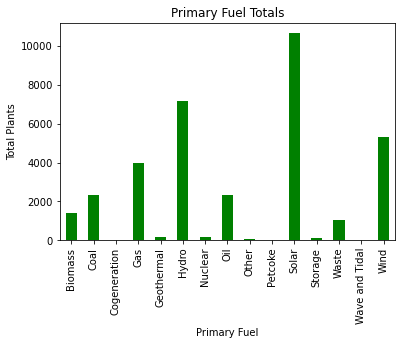

In [48]:
fuel_group = merged_power_plantdf.groupby('Primary Fuel')
count_Primaryfuel = fuel_group['Primary Fuel'].count()
count_Primaryfuel.sort_values(ascending=False)
#Create Chart
fuel_chart = count_Primaryfuel.plot(kind='bar', title= "Primary Fuel Totals", color = 'Green', align = 'center')
fuel_chart.set_xlabel("Primary Fuel")
fuel_chart.set_ylabel("Total Plants");

count_Primaryfuel.head()

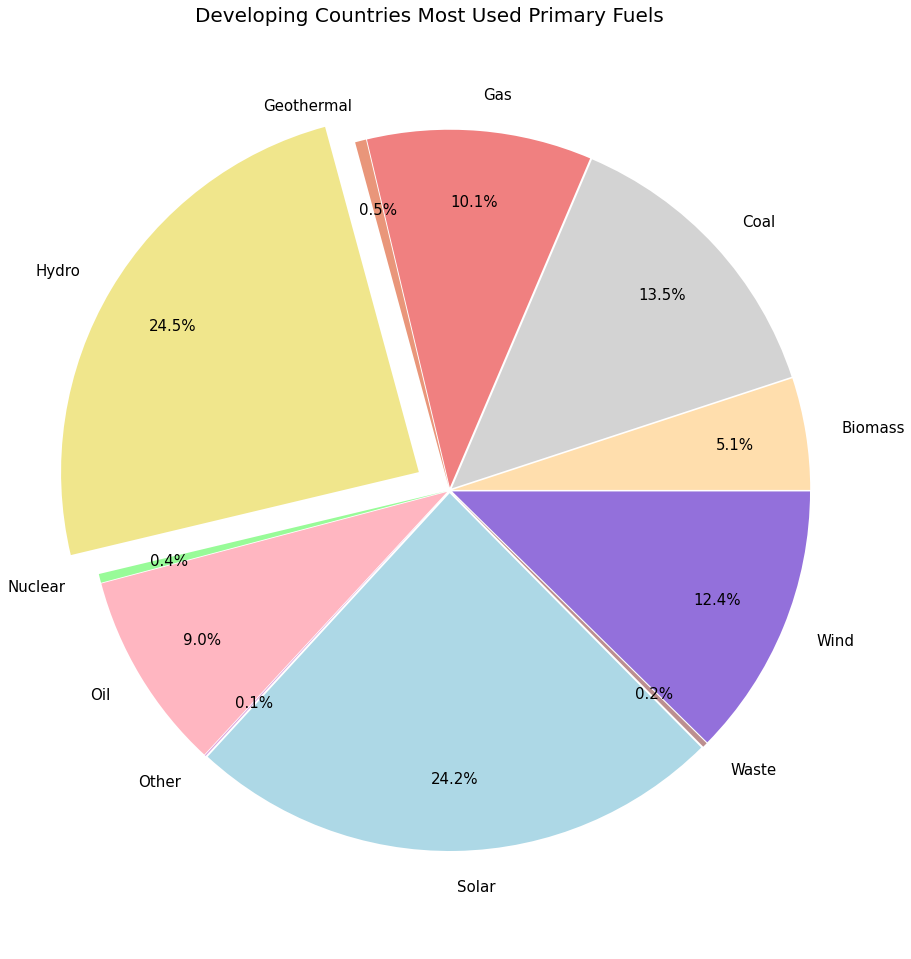

In [135]:
fuel_group1 = Developing_power_plant.groupby('Primary Fuel')
DEVGcount_Primaryfuel = fuel_group1['Primary Fuel'].count()
DEVGcount_Primaryfuel.sort_values(ascending=False)

DEVGcount_Primaryfuel.head()
colors1 = ('navajowhite', 'lightgray','lightcoral','darksalmon','khaki','palegreen','lightpink','plum','lightblue','rosybrown', 'mediumpurple')
explode = (0.008,0.008,0.008,0.008,0.1,0.008,0.008,0.008,0.008,0.008,0.008)


textprops = {"fontsize":15}
DEVGcount_Primaryfuel.plot(kind='pie', explode = explode, startangle=0, figsize=(15,17), autopct="%1.1f%%", textprops = textprops, colors=colors1, pctdistance = 0.8)
plt.title('Developing Countries Most Used Primary Fuels', fontdict = {'fontsize':20})
plt.axis("equal")
plt.ylabel("");
plt.savefig("Developing PieChart.png")





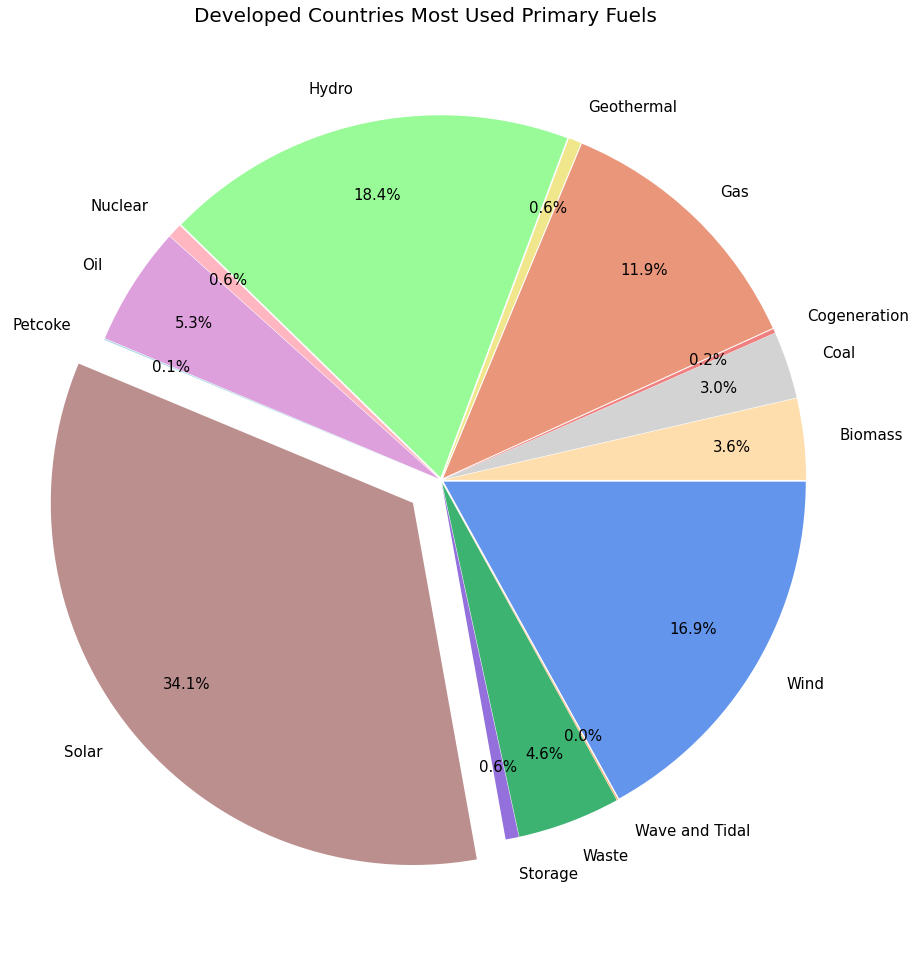

In [136]:
fuel_group2 = Developed_power_plant.groupby('Primary Fuel')
DEVDcount_Primaryfuel = fuel_group2['Primary Fuel'].count()
DEVDcount_Primaryfuel.sort_values(ascending=False)
filterdDEVD = DEVDcount_Primaryfuel.drop('Other')

colors1 = ('navajowhite', 'lightgray','lightcoral','darksalmon','khaki','palegreen','lightpink','plum','lightblue','rosybrown', 'mediumpurple','mediumseagreen','sandybrown','cornflowerblue')
explode = (0.008,0.008,0.008,0.008,0.008,0.008,0.008,0.008,0.008,0.1,0.008,0.008,0.008,0.008)
textprops = {"fontsize":15}
filterdDEVD.plot(kind='pie', explode = explode, startangle=0, figsize=(15,17), autopct="%1.1f%%", textprops = textprops, pctdistance = 0.8,colors=colors1)
plt.title('Developed Countries Most Used Primary Fuels', fontdict = {'fontsize':20})
plt.axis("equal")
plt.ylabel("")
plt.savefig("Developed PieChart.png");
